<a href="https://colab.research.google.com/github/jahidhassanbd/ML-Basic-Coding/blob/main/AC_Predictive_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/AC_DATA.csv')

In [7]:
print(data)

       id   rpm   motor_power     torque  outlet_pressure_bar    air_flow  \
0       1   499   1405.842858  27.511708                1.000  308.289879   
1       2   513   1457.370092  31.030115                1.081  307.833736   
2       3   495   1582.249959  33.484653                1.369  307.377593   
3       4   480   1712.466820  36.394475                1.691  306.975248   
4       5   498   1766.035170  38.249154                1.731  306.832132   
..    ...   ...           ...        ...                  ...         ...   
995   996  2485  18141.242510  72.206554                6.938  470.274717   
996   997  2519  18811.531550  74.163503                7.109  476.563145   
997   998  2514  18784.923040  71.763552                7.113  473.831118   
998   999  2490  18612.827210  73.097871                7.113  468.394650   
999  1000  2499  19454.559080  78.928760                7.425  469.821267   

      noise_db  outlet_temp  wpump_outlet_press  water_inlet_temp  ...  \
0

In [8]:
data_overview = data.head()

# Getting the shape of the dataset
data_shape = data.shape

# Checking for missing values
missing_values = data.isnull().sum()

# Checking data types
data_types = data.dtypes

data_overview, data_shape, missing_values, data_types

(   id  rpm  motor_power     torque  outlet_pressure_bar    air_flow  \
 0   1  499  1405.842858  27.511708                1.000  308.289879   
 1   2  513  1457.370092  31.030115                1.081  307.833736   
 2   3  495  1582.249959  33.484653                1.369  307.377593   
 3   4  480  1712.466820  36.394475                1.691  306.975248   
 4   5  498  1766.035170  38.249154                1.731  306.832132   
 
     noise_db  outlet_temp  wpump_outlet_press  water_inlet_temp  ...  \
 0  40.840517    78.554715            2.960632         43.166392  ...   
 1  40.484226    76.902822            2.536711         47.342143  ...   
 2  40.918572    77.547021            2.112789         49.306593  ...   
 3  40.450953    80.059949            2.087534         46.886933  ...   
 4  41.233739    79.130424            2.338877         50.498100  ...   
 
       gaccy     gaccz     haccx     haccy     haccz  bearings  wpump  \
 0  0.383773  2.649801  1.213344  1.409218  2.962484 

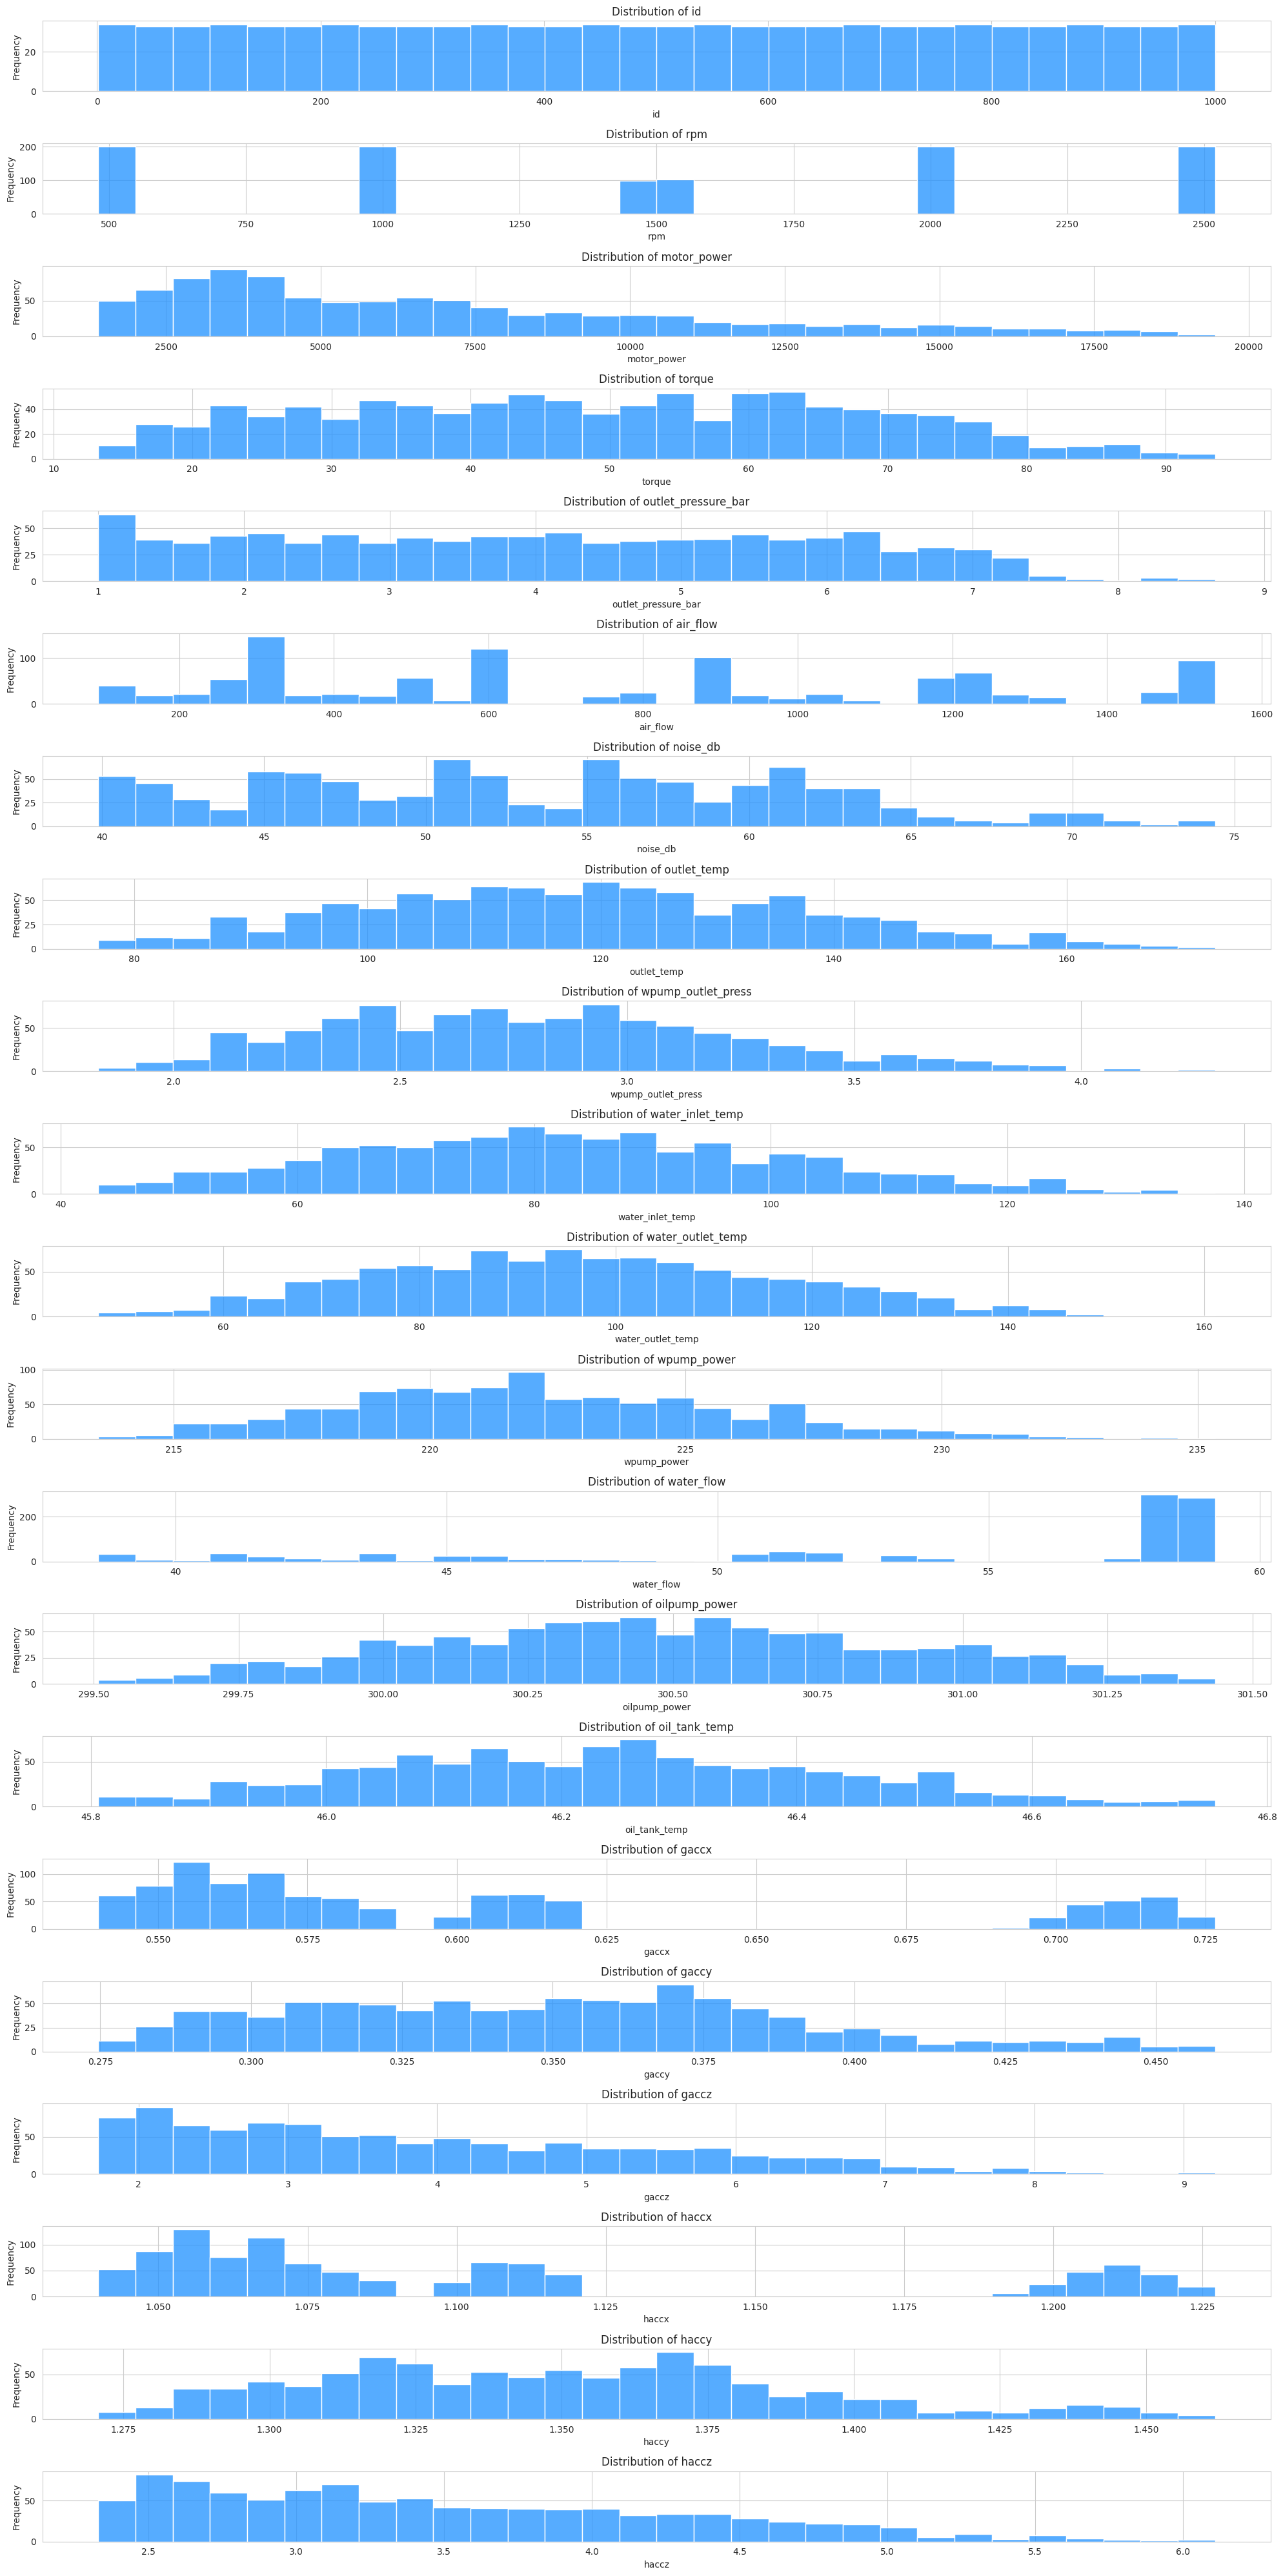

In [9]:
# Distribution
# Setting the style for the plots
sns.set_style('whitegrid')

# Filtering out numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 40))

# Plotting histograms for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(data[col], color='dodgerblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-10-aca18066a9be>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette=['dodgerblue', 'red'])
<ipython-input-10-aca18066a9be>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette=['dodgerblue', 'red'])
<ipython-input-10-aca18066a9be>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette=['dodgerblue', 'red'])
<ipython-input-10-aca18066a9be>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

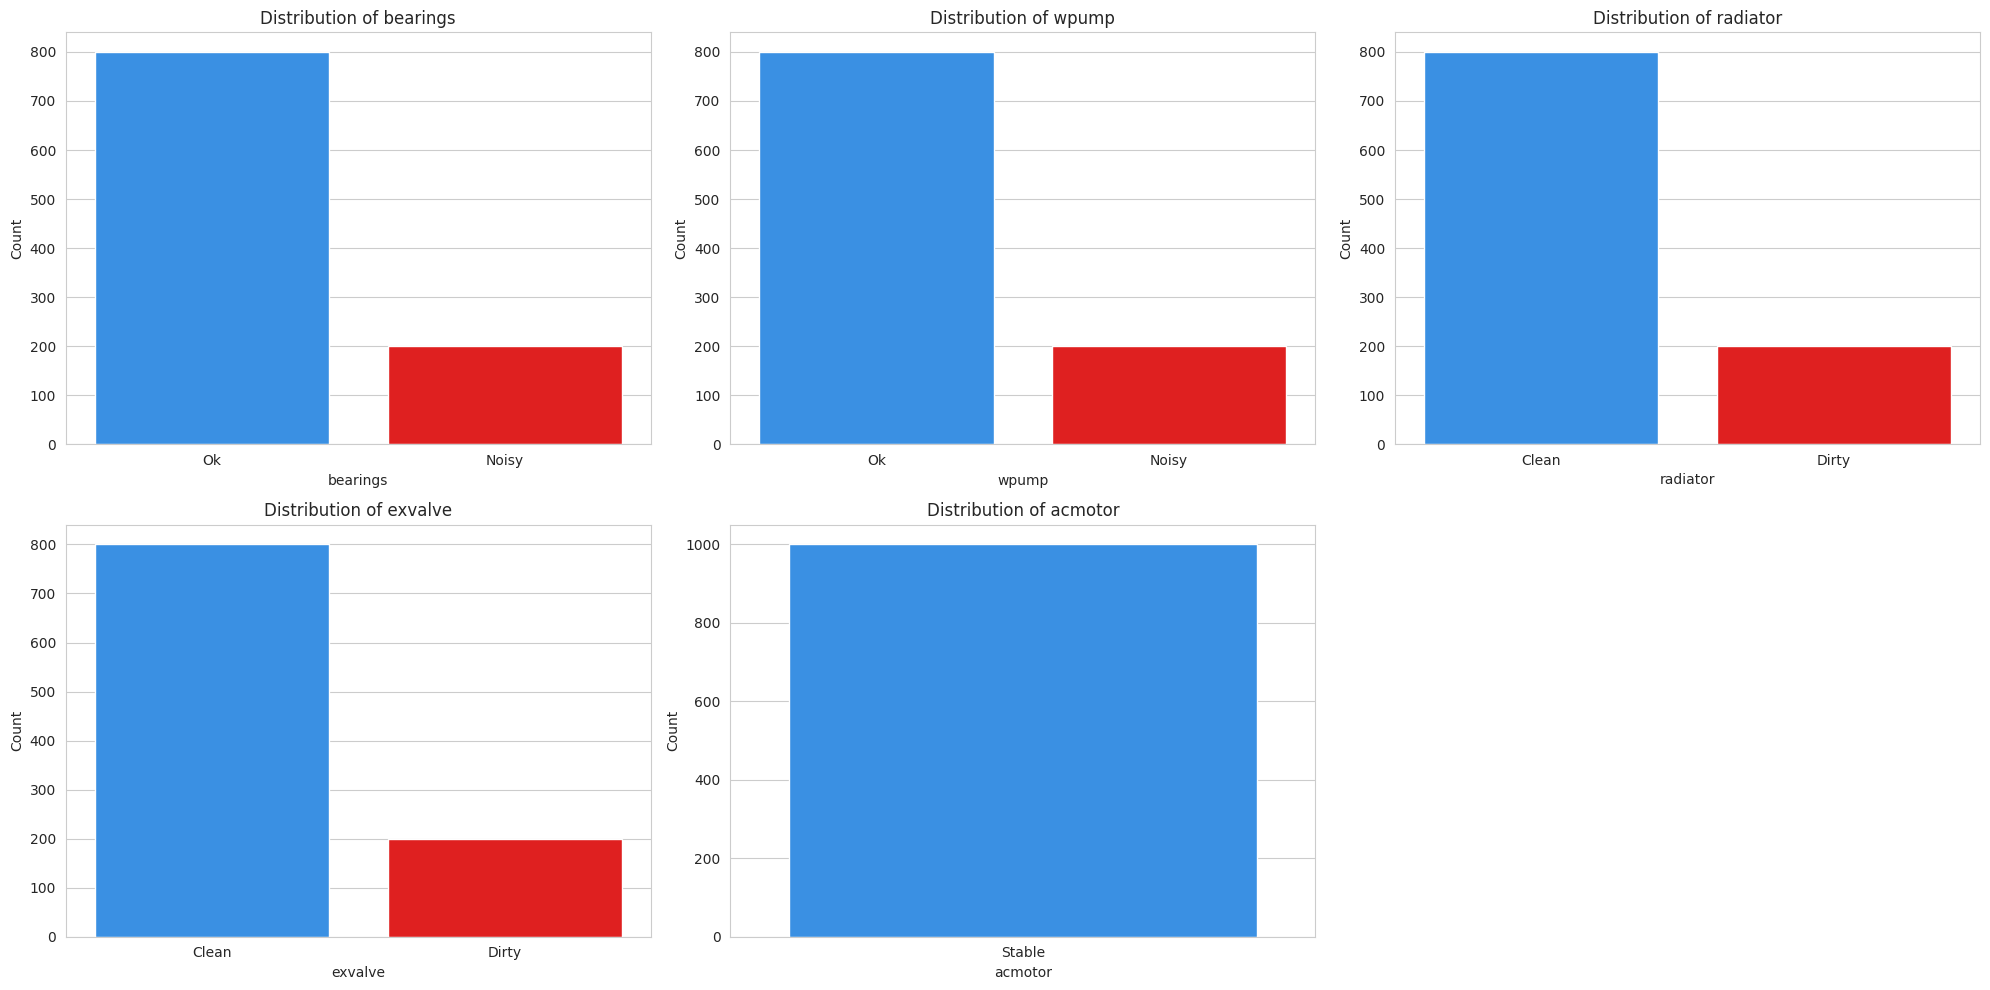

In [10]:
# Distribution
# Setting the style for the plots
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

# Distribution of all object format values
object_columns = data.select_dtypes(include=['object']).columns

# Plotting count plots for each object column
for i, col in enumerate(object_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=data[col], palette=['dodgerblue', 'red'])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    if i == 5: # Break the loop after the fifth plot
        break

plt.tight_layout()
plt.show()

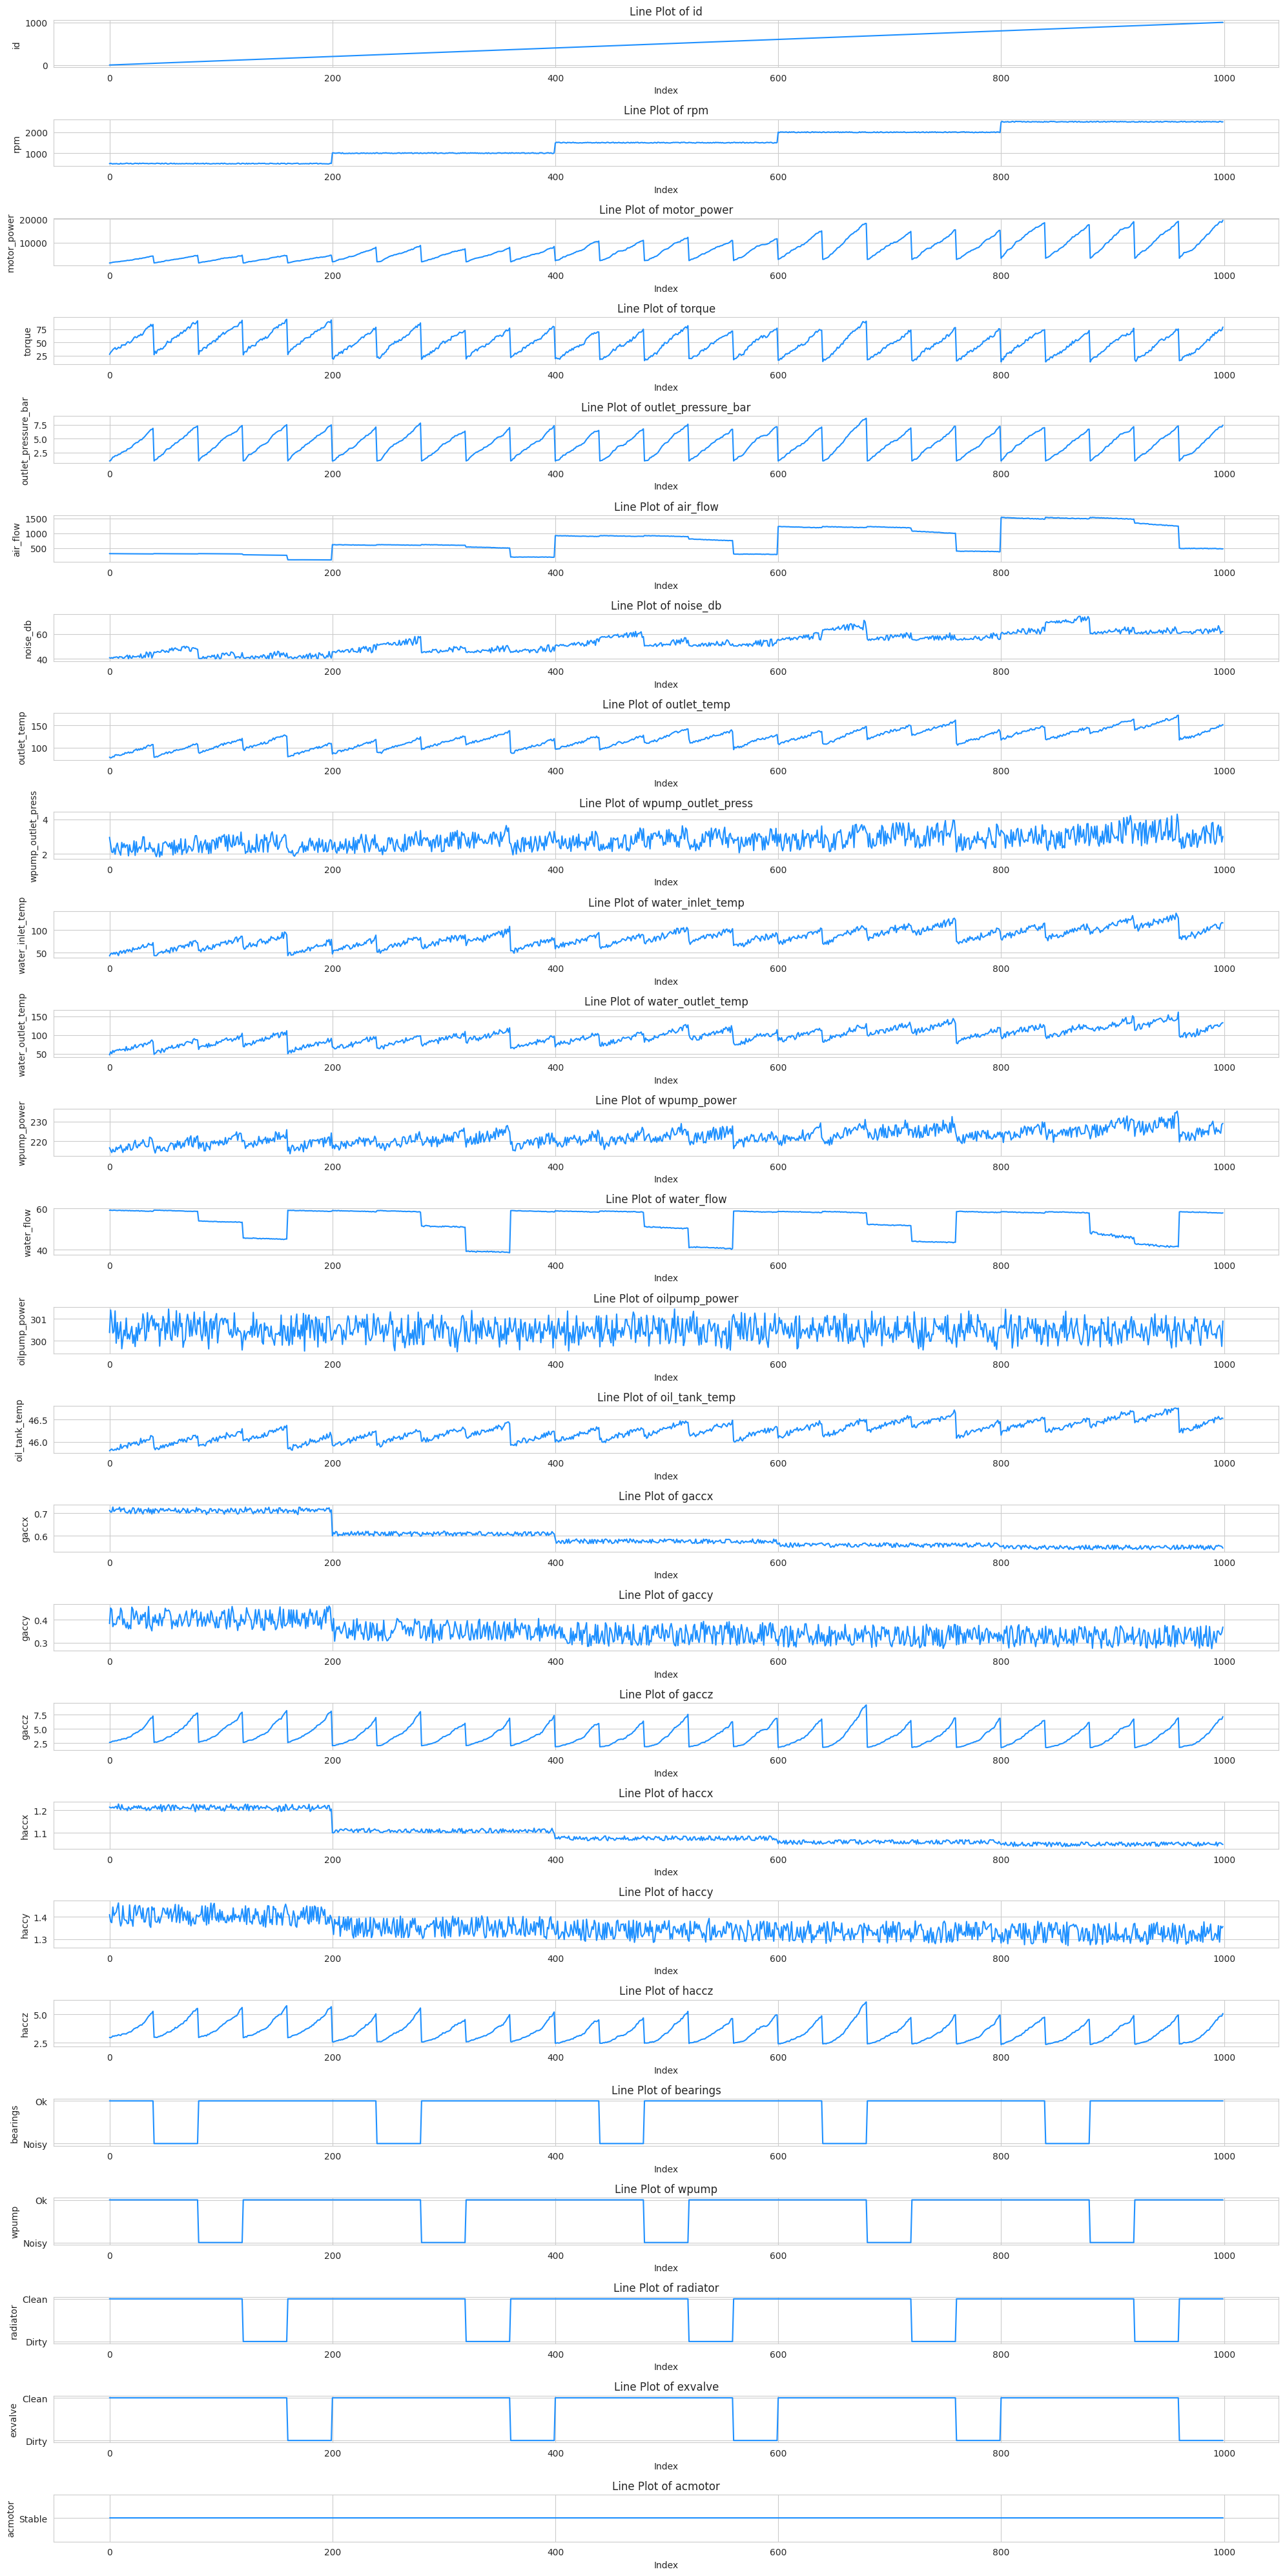

In [11]:
# Visualization

plt.figure(figsize=(20, 40))

# Plotting line plots for each numerical column
for i, col in enumerate(data.columns, 1):
    plt.subplot(len(data.columns), 1, i)
    sns.lineplot(data=data, x=data.index, y=col, color='dodgerblue')
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

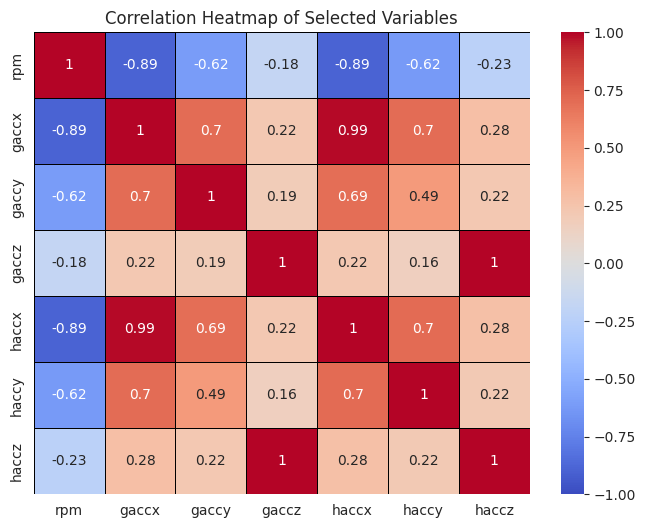

In [13]:
# Analyze data from vibration sensors
# Calculate the correlation matrix for the selected columns
correlation_matrix = data[['rpm', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import joblib

# Encode categorical variables
categorical_columns = ['bearings', 'wpump', 'radiator', 'exvalve', 'acmotor']
label_encoders = {col: LabelEncoder().fit(data[col]) for col in categorical_columns}
for col, le in label_encoders.items():
    data[col] = le.transform(data[col])

# Standardize numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Apply Agglomerative Clustering
clustering_model = AgglomerativeClustering(n_clusters=3)
data['cluster'] = clustering_model.fit_predict(data[numerical_columns])

In [17]:
drive_path = '/content/drive/MyDrive/Dataset/agglomerative_clustering_model.pkl'
joblib.dump(clustering_model, drive_path)

['/content/drive/MyDrive/Dataset/agglomerative_clustering_model.pkl']